## Importing Libraries and Datasets

In [54]:
import pandas as pd
import os
import matplotlib.pyplot as plt
from PIL import Image
import io

In [55]:
save_path = r'C:\Users\smcco\Downloads\archive\mturkfitbit_export_4.12.16-5.12.16\Nutrition5k'
image_df = pd.read_pickle(os.path.join(save_path, 'dish_images.pkl'))
dishes = pd.read_excel(os.path.join(save_path, 'dishes.xlsx'))
dish_ingredients = pd.read_excel(os.path.join(save_path, 'dish_ingredients.xlsx'))
ingredients = pd.read_excel(os.path.join(save_path, 'ingredients.xlsx'))

## EDA

#### dishes

In [56]:
dishes

,dish_id,total_mass,total_calories,total_fat,total_carb,total_protein
0,dish_1561662216,300.794281,193,12.387489,28.218290,18.633970
1,dish_1562688426,137.569992,88,8.256000,5.190000,10.297000
2,dish_1561662054,419.438782,292,23.838249,26.351543,25.910593
3,dish_1562008979,382.936646,290,22.224644,10.173570,35.345387
4,dish_1560455030,20.590000,103,0.148000,4.625000,0.956000
...,...,...,...,...,...,...
5001,dish_1571934465,0.000000,232,0.000000,0.000000,0.000000
5002,dish_1573073666,0.000000,15,0.000000,0.000000,0.000000
5003,dish_1575924356,0.000000,103,0.000000,0.000000,0.000000
5004,dish_1574359199,0.000000,329,0.000000,0.000000,0.000000


In [57]:
dishes.describe()

,total_mass,total_calories,total_fat,total_carb,total_protein
count,5006.000000,5006.000000,5006.000000,5006.000000,5006.000000
mean,213.332125,189.980224,10.721587,17.002987,14.476484
std,308.762649,269.299511,24.455768,28.680633,18.561609
min,0.000000,1.000000,0.000000,0.000000,0.000000
25%,49.939999,73.000000,0.378500,4.338500,1.296000
50%,141.699997,145.000000,5.823762,11.801218,7.047808
75%,314.518776,257.000000,15.447732,23.570615,21.463784
max,9485.815430,7975.000000,875.541016,844.568604,147.491821


In [58]:
# Count dishes with missing macronutrients
no_fat = dishes[dishes['total_fat'] == 0]
no_carb = dishes[dishes['total_carb'] == 0]
no_protein = dishes[dishes['total_protein'] == 0]

# Count dishes missing all macronutrients
no_macros = dishes[
    (dishes['total_fat'] == 0) &
    (dishes['total_carb'] == 0) &
    (dishes['total_protein'] == 0)
]

# Count dishes with at least one nonzero macronutrient
valid_macros = dishes[
    ~(
        (dishes['total_fat'] == 0) &
        (dishes['total_carb'] == 0) &
        (dishes['total_protein'] == 0)
    )
]

# Display results with clear labels
print(f"Number of dishes with 0 fat:       {no_fat.shape[0]}")
print(f"Number of dishes with 0 carbs:     {no_carb.shape[0]}")
print(f"Number of dishes with 0 protein:   {no_protein.shape[0]}")
print(f"Number of dishes with ALL zeros:   {no_macros.shape[0]}")
print(f"Number of valid (non-zero) dishes: {valid_macros.shape[0]}")


Number of dishes with 0 fat:       271
Number of dishes with 0 carbs:     306
Number of dishes with 0 protein:   240
Number of dishes with ALL zeros:   240
Number of valid (non-zero) dishes: 4766


#### dish_ingredients

In [59]:
dish_ingredients

,dish_id,ingr_id,ingr_name,grams,calories,fat,carb,protein
0,dish_1561662216,ingr_0000000508,soy sauce,3.398568,1.801241,0.020391,0.166530,0.275284
1,dish_1561662216,ingr_0000000122,garlic,2.124105,3.164916,0.010621,0.700955,0.135943
2,dish_1561662216,ingr_0000000026,white rice,8.496420,11.045346,0.025489,2.378998,0.229403
3,dish_1561662216,ingr_0000000524,parsley,0.213397,0.079170,0.001707,0.013657,0.006189
4,dish_1561662216,ingr_0000000094,onions,1.707173,0.682869,0.001707,0.153646,0.018779
...,...,...,...,...,...,...,...,...
28450,dish_1576171157,ingr_0000000077,almonds,0.294420,1.702042,0.145738,0.066833,0.065950
28451,dish_1576171157,ingr_0000000161,olive oil,1.430858,12.648785,1.430858,0.000000,0.000000
28452,dish_1576171157,ingr_0000000203,chili,0.953905,0.381562,0.003816,0.084898,0.017170
28453,dish_1576171157,ingr_0000000291,salt,0.008412,0.000000,0.000000,0.000000,0.000000


In [60]:
dish_ingredients.describe()

,grams,calories,fat,carb,protein
count,28455.000000,28455.000000,28455.000000,28455.000000,28455.000000
mean,34.259146,39.632140,2.005685,3.124736,2.670988
std,130.987326,123.938818,10.045610,12.070679,7.837898
min,0.001059,0.000000,0.000000,0.000000,0.000000
25%,1.217384,0.489875,0.003077,0.017182,0.010084
50%,7.563636,6.255319,0.056978,0.274640,0.143219
75%,50.240406,39.441348,0.721286,2.836151,1.058157
max,7974.000000,9170.100000,853.218000,837.480000,118.265700


In [61]:
print("dish statistics based on ingredients:")
dish_ingredients.groupby('dish_id')['ingr_id'].count().describe()

dish statistics based on ingredients:


count    5006.000000
mean        5.684179
std         6.273514
min         1.000000
25%         1.000000
50%         3.000000
75%         9.000000
max        34.000000
Name: ingr_id, dtype: float64

*There are a total of 28,455 DishXIngredients with an average of 5.6 ingredients per dish and max of 34 ingredients in a dish.*

In [62]:
# Count dish_ingredients with missing macronutrients
no_fat = dish_ingredients[dish_ingredients['fat'] == 0]
no_carb = dish_ingredients[dish_ingredients['carb'] == 0]
no_protein = dish_ingredients[dish_ingredients['protein'] == 0]

# Count dish_ingredients missing all macronutrients
no_macros = dish_ingredients[
    (dish_ingredients['fat'] == 0) &
    (dish_ingredients['carb'] == 0) &
    (dish_ingredients['protein'] == 0)
]

# Count dish_ingredients with at least one nonzero macronutrient
valid_macros = dish_ingredients[
    ~(
        (dish_ingredients['fat'] == 0) &
        (dish_ingredients['carb'] == 0) &
        (dish_ingredients['protein'] == 0)
    )
]

# Display results with clear labels
print(f"Number of dish_ingredients with 0 fat:       {no_fat.shape[0]}")
print(f"Number of dish_ingredients with 0 carb:      {no_carb.shape[0]}")
print(f"Number of dish_ingredients with 0 protein:   {no_protein.shape[0]}")
print(f"Number of dish_ingredients with ALL zeros:   {no_macros.shape[0]}")
print(f"Number of valid (non-zero) dish_ingredients: {valid_macros.shape[0]}")

Number of dish_ingredients with 0 fat:       4066
Number of dish_ingredients with 0 carb:      5541
Number of dish_ingredients with 0 protein:   4180
Number of dish_ingredients with ALL zeros:   2277
Number of valid (non-zero) dish_ingredients: 26178


#### ingredients

In [63]:
ingredients

,ingr,id,cal/g,fat(g),carb(g),protein(g)
0,cottage cheese,1,0.980,0.043,0.034,0.110
1,strawberries,2,0.330,0.003,0.080,0.007
2,garden salad,3,0.646,0.034,0.032,0.061
3,bacon,4,5.410,0.420,0.014,0.370
4,potatoes,5,0.770,0.001,0.170,0.020
...,...,...,...,...,...,...
550,pizza sauce,551,0.290,0.002,0.070,0.013
551,pomegranate,552,0.830,0.012,0.190,0.017
552,nut cheese,553,2.100,0.101,0.040,0.256
553,soy sausage,554,2.020,0.144,0.063,0.160


In [64]:
ingredients.describe()

,id,cal/g,fat(g),carb(g),protein(g)
count,555.000000,555.000000,555.000000,555.000000,555.000000
mean,278.000000,2.050568,0.102758,0.201297,0.086306
std,160.358972,1.682599,0.159623,0.226562,0.092602
min,1.000000,0.000000,0.000000,0.000000,0.000000
25%,139.500000,0.608000,0.003000,0.036000,0.015000
50%,278.000000,1.637000,0.035000,0.111000,0.051000
75%,416.500000,3.062500,0.140000,0.270000,0.130000
max,555.000000,9.033000,1.010000,1.000000,0.800000


In [69]:
# Count ingredients with missing macronutrients
no_fat = ingredients[ingredients['fat(g)'] == 0]
no_carb = ingredients[ingredients['carb(g)'] == 0]
no_protein = ingredients[ingredients['protein(g)'] == 0]

# Count ingredients missing all macronutrients
no_macros = ingredients[
    (ingredients['fat(g)'] == 0) &
    (ingredients['carb(g)'] == 0) &
    (ingredients['protein(g)'] == 0)
]

# Count ingredients with at least one nonzero macronutrient
valid_macros = ingredients[
    ~(
        (ingredients['fat(g)'] == 0) &
        (ingredients['carb(g)'] == 0) &
        (ingredients['protein(g)'] == 0)
    )
]

# Display results with clear labels
print(f"Number of ingredients with 0 fat(g):       {no_fat.shape[0]}")
print(f"Number of ingredients with 0 carb(g):      {no_carb.shape[0]}")
print(f"Number of ingredients with 0 protein(g):   {no_protein.shape[0]}")
print(f"Number of ingredients with ALL zeros:      {no_macros.shape[0]}")
print(f"Number of valid (non-zero) ingredients:    {valid_macros.shape[0]}")

Number of ingredients with 0 fat(g):       38
Number of ingredients with 0 carb(g):      57
Number of ingredients with 0 protein(g):   23
Number of ingredients with ALL zeros:      7
Number of valid (non-zero) ingredients:    548


In [70]:
image_df = pd.merge(image_df, dishes, left_on='dish', right_on='dish_id', how='left').drop('dish_id', axis=1)
image_df

,dish,rgb_image,depth_image,total_mass_x,total_calories_x,total_fat_x,total_carb_x,total_protein_x,total_mass_y,total_calories_y,total_fat_y,total_carb_y,total_protein_y
0,dish_1559243887,b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\...,b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\...,289.050018,50,24.750000,11.350000,11.200001,289.050018,50,24.750000,11.350000,11.200001
1,dish_1563568319,b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\...,b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\...,604.323303,347,28.784986,53.148632,37.726025,604.323303,347,28.784986,53.148632,37.726025
2,dish_1558641007,b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\...,b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\...,23.369999,57,0.114000,5.700000,0.513000,23.369999,57,0.114000,5.700000,0.513000
3,dish_1558109945,b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\...,b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\...,74.360001,143,0.286000,0.429000,20.020000,74.360001,143,0.286000,0.429000,20.020000
4,dish_1563216412,b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\...,b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\...,172.449982,205,0.714000,36.610001,5.238000,172.449982,205,0.714000,36.610001,5.238000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3485,dish_1563564828,b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\...,b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\...,452.214478,355,25.004564,38.766243,34.570633,452.214478,355,25.004564,38.766243,34.570633
3486,dish_1566587689,b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\...,b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\...,196.846970,270,7.475343,15.383455,18.580095,196.846970,270,7.475343,15.383455,18.580095
3487,dish_1575307819,b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\...,b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\...,0.000000,114,0.000000,0.000000,0.000000,0.000000,114,0.000000,0.000000,0.000000
3488,dish_1559242155,b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\...,b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\...,116.116005,203,0.203000,30.855999,0.812000,116.116005,203,0.203000,30.855999,0.812000


In [67]:
def wrap_text_by_words(text, max_chars=60):
    """
    Wraps text at word boundaries so lines are no longer than max_chars.
    """
    words = text.split()
    lines = []
    current_line = ""
    
    for word in words:
        if len(current_line + " " + word) <= max_chars:
            current_line += " " + word if current_line else word
        else:
            lines.append(current_line)
            current_line = word
    if current_line:
        lines.append(current_line)
    
    return '\n'.join(lines)

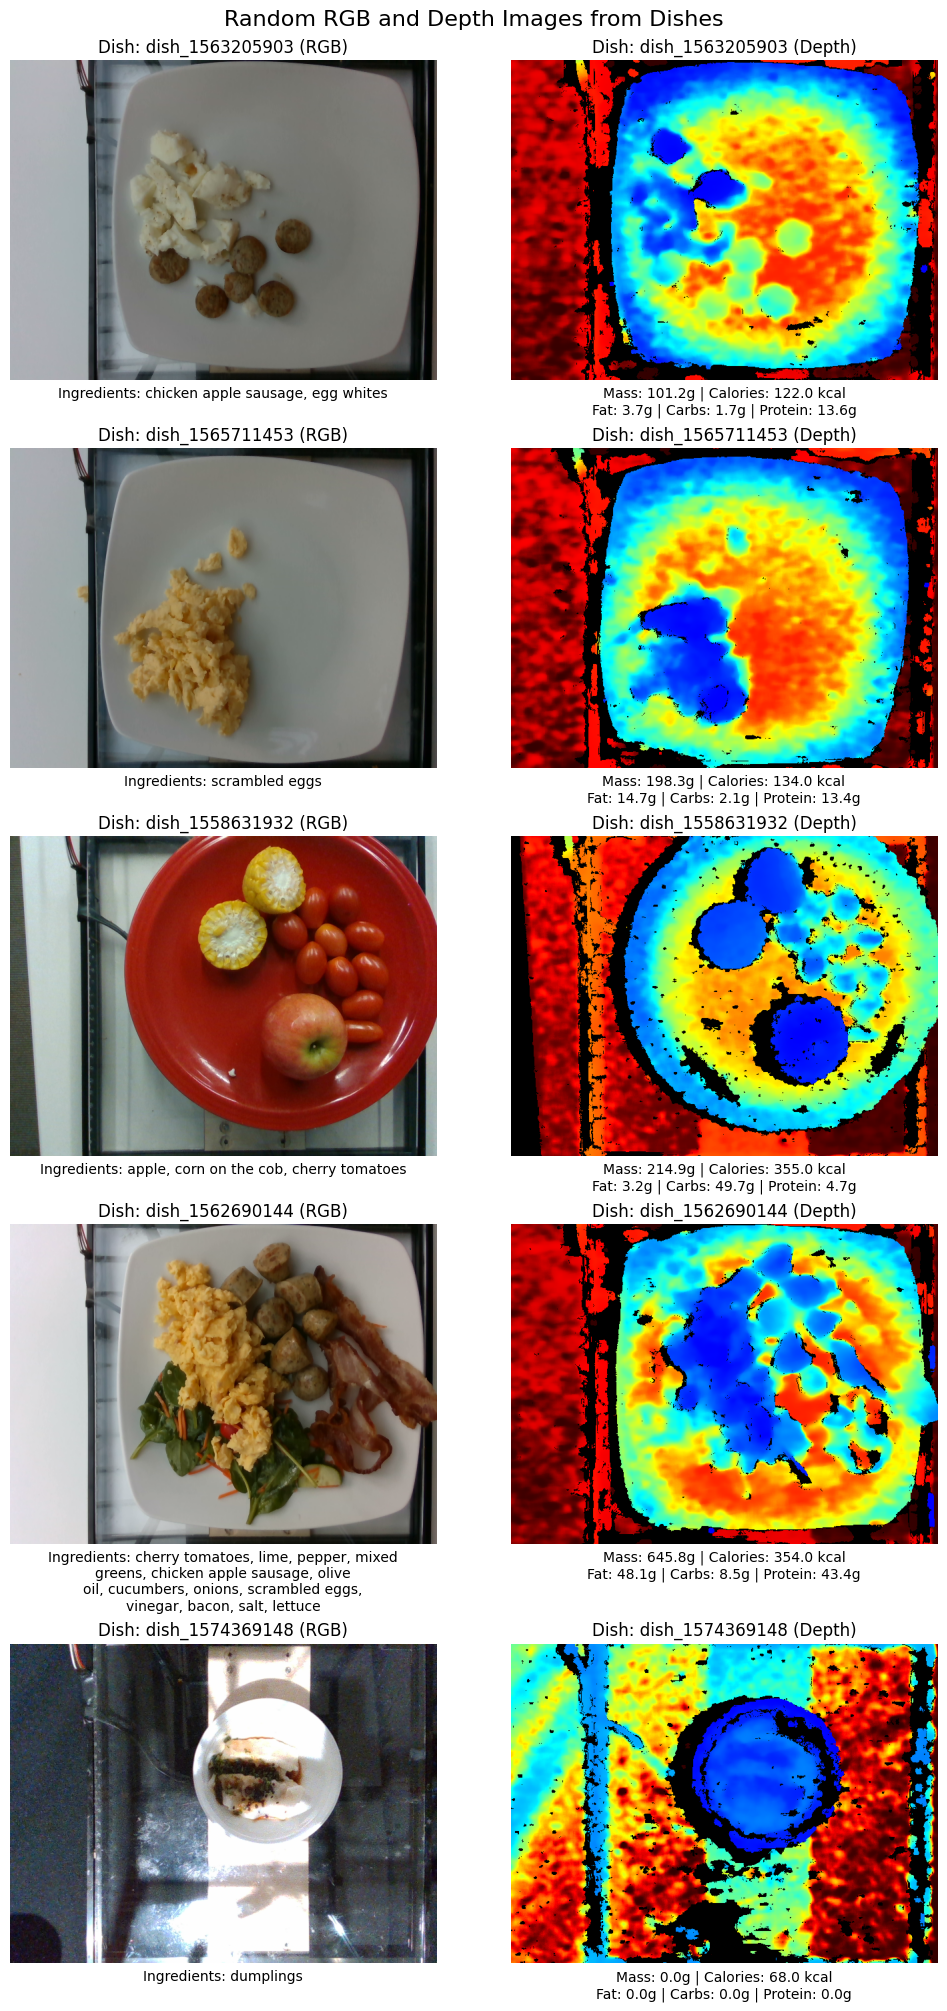

In [68]:
images_to_plot = 5
figsize = (10, 20)

# Pick 5 random rows
sample_df = image_df.sample(images_to_plot, random_state=42).reset_index(drop=True)

# Plot the images
fig, axes = plt.subplots(nrows=5, ncols=2, figsize=figsize, constrained_layout=True)
fig.suptitle("Random RGB and Depth Images from Dishes", fontsize=16)

for i in range(5):
    # Get the dish ID and list of ingredients
    dish_id = sample_df.loc[i, 'dish']
    ingredients_list = ', '.join(dish_ingredients[
        dish_ingredients['dish_id'] == dish_id]['ingr_name'].values)
    ingredients_list = wrap_text_by_words(ingredients_list, figsize[1] * 2)

    # Decode RGB image
    rgb_bytes = sample_df.loc[i, 'rgb_image']
    rgb_image = Image.open(io.BytesIO(rgb_bytes))

    # Decode Depth image
    depth_bytes = sample_df.loc[i, 'depth_image']
    depth_image = Image.open(io.BytesIO(depth_bytes))

    # Plot RGB
    axes[i, 0].imshow(rgb_image)
    axes[i, 0].set_title(f"Dish: {dish_id} (RGB)")
    axes[i, 0].axis('off')

    # Plot Depth
    axes[i, 1].imshow(depth_image, cmap='plasma')
    axes[i, 1].set_title(f"Dish: {dish_id} (Depth)")
    axes[i, 1].axis('off')

    # Position ingredients list under RGB image
    axes[i, 0].text(
        0.5, -0.02, f"Ingredients: {ingredients_list}",
        transform=axes[i, 0].transAxes,
        ha='center', va='top', fontsize=10, wrap=True
    )

    # Add nutrient info as text below depth image
    nutrients = (
        f"Mass: {sample_df.loc[i, 'total_mass']:.1f}g | "
        f"Calories: {sample_df.loc[i, 'total_calories']:.1f} kcal\n"
        f"Fat: {sample_df.loc[i, 'total_fat']:.1f}g | "
        f"Carbs: {sample_df.loc[i, 'total_carb']:.1f}g | "
        f"Protein: {sample_df.loc[i, 'total_protein']:.1f}g"
    )

    # Position text under depth image
    axes[i, 1].text(
        0.5, -0.02, nutrients,
        transform=axes[i, 1].transAxes,
        ha='center', va='top', fontsize=10
    )

plt.show()